<a href="https://colab.research.google.com/github/sai2119/AQI-INDIA/blob/master/air_quality_analsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/result_without_nan.csv')

In [3]:
data.head()

,city,Timestamp,pm25,o3,co,so2,pm10,no2,latitude,longitude
0,Aurangabad,21-05-2020 12:30,13.45,51.88,340.0,4.96,52.10,13.05,19.838944,75.244448
1,Aurangabad,21-05-2020 12:15,14.04,54.23,320.0,6.12,49.92,2.72,19.838944,75.244448
2,Aurangabad,21-05-2020 12:00,14.04,50.92,420.0,5.49,49.92,10.97,19.838944,75.244448
3,Aurangabad,21-05-2020 11:00,13.11,48.12,670.0,4.63,49.96,16.98,19.838944,75.244448
4,Aurangabad,21-05-2020 10:30,13.50,50.21,590.0,3.72,49.63,19.23,19.838944,75.244448


In [4]:
 data.dtypes

city           object
 Timestamp     object
pm25          float64
o3            float64
co            float64
so2           float64
pm10          float64
no2           float64
latitude      float64
longitude     float64
dtype: object

In [5]:

data[' Timestamp'] = pd.to_datetime(data[' Timestamp'],format='%d-%m-%Y %H:%M')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787558 entries, 0 to 787557
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   city        787558 non-null  object        
 1    Timestamp  787558 non-null  datetime64[ns]
 2   pm25        787558 non-null  float64       
 3   o3          787558 non-null  float64       
 4   co          787558 non-null  float64       
 5   so2         787558 non-null  float64       
 6   pm10        787558 non-null  float64       
 7   no2         787558 non-null  float64       
 8   latitude    787558 non-null  float64       
 9   longitude   787558 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 60.1+ MB


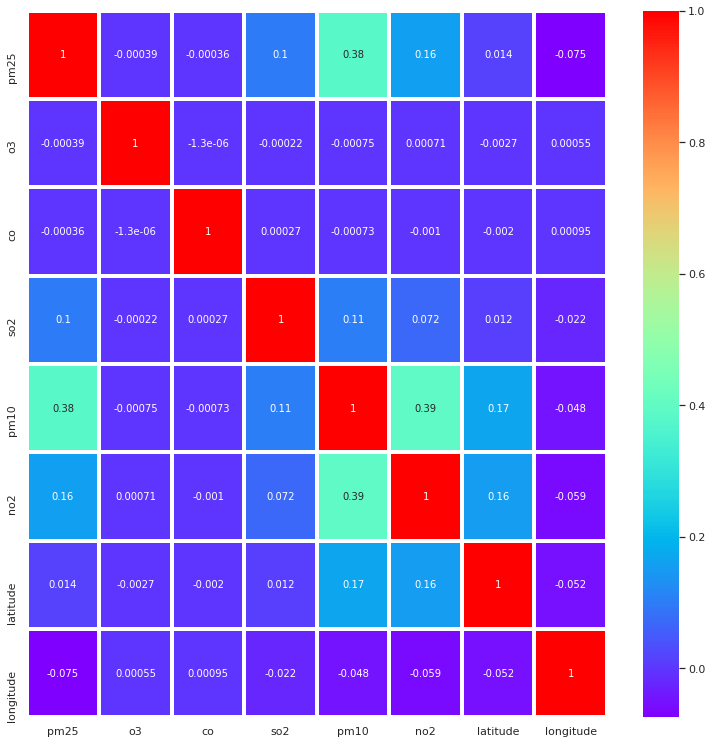

In [6]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(13,13))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap='rainbow',linewidths=3)

In [7]:
city_pm25 = data.groupby('city').pm25.mean()

city_o3 = data.groupby('city').o3.mean()
city_co	 = data.groupby('city').co.mean()
city_so2 = data.groupby('city').so2.mean()
city_pm10 = data.groupby('city').pm10.mean()
city_no2 = data.groupby('city').no2.mean()
print(city_pm25,city_o3,city_co,city_so2,city_pm10,city_no2)

city
 Alwar           32.579331
Ahmedabad        44.804395
Aizawl           27.944918
Ajmer            37.053331
Amaravati        22.410654
                   ...    
Vatva            54.163563
Vijayapura       47.912020
Visakhapatnam    26.138110
Yadgir           30.494764
Yamunanagar      49.553035
Name: pm25, Length: 101, dtype: float64 city
 Alwar           36.962138
Ahmedabad        45.226862
Aizawl            7.524666
Ajmer            62.112563
Amaravati        35.066366
                   ...    
Vatva            21.646303
Vijayapura       49.730458
Visakhapatnam    20.171044
Yadgir           35.430445
Yamunanagar      39.903315
Name: o3, Length: 101, dtype: float64 city
 Alwar           1.938567e+13
Ahmedabad        2.053842e+13
Aizawl           3.333023e+02
Ajmer            2.390412e+13
Amaravati        5.120903e+17
                     ...     
Vatva            3.376715e+12
Vijayapura       2.406877e+13
Visakhapatnam    1.916714e+13
Yadgir           4.808429e+02
Yamunanagar  

In [8]:
city_describe_pm25 = data.groupby('city').pm25.describe()
city_describe_o3 = data.groupby('city').o3.describe()
city_describe_co	 = data.groupby('city').co.describe()
city_describe_so2 = data.groupby('city').so2.describe()
city_describe_pm10 = data.groupby('city').pm10.describe()
city_describe_no2 = data.groupby('city').no2.describe()
print(city_describe_pm25,city_describe_o3,city_describe_co,city_describe_so2,city_describe_pm10,city_describe_no2)

                count       mean        std  ...     50%      75%     max
city                                         ...                         
 Alwar         5860.0  32.579331  13.131242  ...  31.785  42.9100   80.52
Ahmedabad      5609.0  44.804395  52.386456  ...  35.350  51.2200  999.99
Aizawl         2574.0  27.944918  17.479719  ...  26.000  39.7775  122.00
Ajmer          6091.0  37.053331  21.004376  ...  32.900  47.0500  187.60
Amaravati      2463.0  22.410654  11.092671  ...  20.000  29.0000   67.00
...               ...        ...        ...  ...     ...      ...     ...
Vatva          2843.0  54.163563  41.713480  ...  43.500  63.3400  296.08
Vijayapura     1396.0  47.912020  23.817128  ...  43.470  53.1100  281.79
Visakhapatnam  5259.0  26.138110  18.278883  ...  22.000  33.0000  121.00
Yadgir         1910.0  30.494764  11.398295  ...  30.000  36.0000  127.00
Yamunanagar    3219.0  49.553035  31.483170  ...  45.800  60.8000  720.70

[101 rows x 8 columns]               

ploting trends

In [9]:
import fbprophet
# Prophet requires columns ds (Date) and y (value)
gm = data.rename(columns={' Timestamp': 'ds', 'pm25': 'y'})
gm.head()





,city,ds,y,o3,co,so2,pm10,no2,latitude,longitude
0,Aurangabad,2020-05-21 12:30:00,13.45,51.88,340.0,4.96,52.10,13.05,19.838944,75.244448
1,Aurangabad,2020-05-21 12:15:00,14.04,54.23,320.0,6.12,49.92,2.72,19.838944,75.244448
2,Aurangabad,2020-05-21 12:00:00,14.04,50.92,420.0,5.49,49.92,10.97,19.838944,75.244448
3,Aurangabad,2020-05-21 11:00:00,13.11,48.12,670.0,4.63,49.96,16.98,19.838944,75.244448
4,Aurangabad,2020-05-21 10:30:00,13.50,50.21,590.0,3.72,49.63,19.23,19.838944,75.244448


In [10]:
# Make the prophet model and fit on the data
gm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.1)
gm_prophet.fit(gm)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [0]:
# Make a future dataframe for 3 years
gm_forecast = gm_prophet.make_future_dataframe(periods=365*3, freq='M')
# Make predictions
gm_forecast = gm_prophet.predict(gm_forecast)

In [0]:
gm_prophet.plot(gm_forecast, xlabel = 'Date', ylabel = 'pm25')
plt.title('25');